# Laboratorio 7

integrantes: 

- Francis Aguilar #22243

- Gerardo Pineda #22808

- Angela Garcia #22869

enlace al repositorio: https://github.com/angelargd8/LAB7-IA   
Video: https://youtu.be/5E8sHykuvpE  


# Task 1 - Teoría

1. ¿Qué es el temporal difference learning y en qué se diferencia de los métodos tradicionales de aprendizaje 
supervisado? Explique el concepto de "error de diferencia temporal" y su papel en los algoritmos de 
aprendizaje por refuerzo 

    El temporal difference learning es un método que combina las ideas del aprendizaje dinámico y del aprendizaje supervisado.
    Este tipo de aprendizaje esta basado en aprender a estimar valores futuros miestras va interactuando con un entorno, en vez de
    esperar hasta el final de una secuencia para ajustar las predicciones. Lo que hace es actualizar gradualmente las estimaciones en 
    función de las diferencias entre predicciones consecutivas. Entonces, las diferencias se usan para ajustar el modelo en tiempo real.
    Acerca del concepto de error de diferencia temporal, esta en los algoritmos de aprendizaje por refuerzo, porque lo que mide es la discrepancia entre la recompensa esperada y la obtenida. 


2. En el contexto de los juegos simultáneos, ¿cómo toman decisiones los jugadores sin conocer las acciones 
de sus oponentes? De un ejemplo de un escenario del mundo real que pueda modelarse como un juego 
simultáneo y discuta las estrategias que los jugadores podrían emplear en tal situación 

    En los juegos simultáneos un jugador al no conocer las acciones del oponente, busca estrategias considerando las posibles acciones del oponente, 
    pensando en obtener la mejor recompensa posible y muchas veces se toma en cuenta que al realizar una accion no dar pistas al oponente.
    Los jugadores también pueden tomar decisiones en función de la información disponible, como por ejemplo, el estado del juego, 
    pero también pueden tomar decisiones basadas en su conocimiento del entorno y de la estrategia de sus oponentes.
    Un ejemplo del mundo real es el juego de werewolf en el que los jugadores no saben el rol de los demás jugadores, y deben tomar decisiones
    a base sin saber si son humanos o lobos, entonces tratan de tomar acciones que no demuestren que rol tienen y simular que todos son humanos, 
    las acciones en este caso son en las votaciones, porque al decir que alguien es el lobo tiene que tener sentido, ya que al no tenerlo lo pueden 
    juzgar que es el lobo y terminar muerto dentro del juego. Mientras que los lobos, deben de ser cautelosos al matar a alguien, ya que si se descubren los acusaran de ser el lobo y terminarán muertos.


3. ¿Qué distingue los juegos de suma cero de los juegos de suma no cero y cómo afecta esta diferencia al 
proceso de toma de decisiones de los jugadores? Proporcione al menos un ejemplo de juegos que entren 
en la categoría de juegos de no suma cero y discuta las consideraciones estratégicas únicas involucradas 

    Lo que distingue a los juegos de suma cero de los juegos de suma de cero son en que los juegos de suma cero los 
    jugadores suelen actuar de una manera más competitiva porque no hay beneficios que se puedan compartir.
    Mientras, en los juegos de suma no cero los jugadores pueden buscar estrategias colaborativas porque hay beneficios que se pueden compartir.

    Un ejemplo de los juegos de suma no cero es Genshin impact, porque en este se pueden hacer partidas colaborativas en donde 
    ambos jugadores obtengan beneficios, como por ejemplo, obtener recompensas, subir de nivel y objeto. Entonces, al entrar a alguna
    mundo de otro jugador o cuando entran al mundo de uno, los jugadores pueden buscar una estrategia que maximice sus beneficios y minimice los beneficios de los demás. Incluso otro ejemplo es minecraft en donde muchas veces se juega multijugador mientras uno cumple el rol de construir la casa, otro exploración y otro minar, para obtener mayores recursos y compartirlos.



4. ¿Cómo se aplica el concepto de equilibrio de Nash a los juegos simultáneos? Explicar cómo el equilibrio de 
Nash representa una solución estable en la que ningún jugador tiene un incentivo para desviarse 
unilateralmente de la estrategia elegida 

    El concepto de equilibrio de Nash se aplica en los juegos simultáneos porque los jugadores toman decisiones al mismo tiempo sin conocer las elecciones de los demás. Las aplicaciones están en la elección de estrategias ótimas cuando el jugador escoge su mejor respuesta para maximizar su utilidad a base de lo que los demás están haciendo. También, se aplica en la evaluación de posibles combinaciones para encontrar el equilibrio, evaluando las posibles combinaciones de estrategias, identificando las que en donde ninguna de las partes pueda mejorar su resultado cambiando su estrategia.



5. Discuta la aplicación del temporal difference learning en el modelado y optimización de procesos de toma 
de decisiones en entornos dinámicos. ¿Cómo maneja el temporal difference learning el equilibrio entre 
exploración y explotación y cuáles son algunos de los desafíos asociados con su implementación en la 
práctica? 

    El temporal difference learning se usa en varios campos, como en la robótica, gestión de recursos y optimización de procesos industriales. Los agentes usan el temporal difference learning para ajustar sus politicas de acción basándose en las recompensas recibidas. Entonces, esto permite una adaptación continua y mejora en la toma de desiciones, esto ayuda al entorno ya que son dinámicos. 

    Acerca de como maneja el temporal difference learning el equilibrio y explotación, es que este maneja el equilibrio por varias estrategias que permiten al agente aprender de manera efectiva en entornos dinámicos, como la estrategia de Epsilon-Greedy y Softmax.
    Los desafíos que puede tener este es en el ajuste de parámetros, ya que determinar el valor óptimo de ε o los parámetros de la función softmax puede ser muy complicado y depende del entorno específico. También en el balance dinámico porque los entornos que cambian muy rápidamente, el equilibrio entre exploración y explotación puede necesitar ajustes contunios para irse adaptando a las nuevas condiciones. Por último, es importante asegurar que el agente explore lo suficiente para descubrir todas las posibles acciones y las consecuencias que tiene.





## Imports

In [1]:
import numpy as np
import random
import math
from IPython.display import clear_output
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt


In [2]:
class Conecta4:
    FILAS = 6
    COLUMNAS = 7
    JUGADOR = 1
    IA = 2

    def __init__(self):
        self.tablero = np.zeros((self.FILAS, self.COLUMNAS), dtype=int)  

    def imprimir_tablero(self):
        print(np.flip(self.tablero, 0)) 

    def es_movimiento_valido(self, columna):
        return self.tablero[self.FILAS - 1, columna] == 0  

    def obtener_fila_disponible(self, columna):
        for fila in range(self.FILAS):
            if self.tablero[fila, columna] == 0:
                return fila
        return None  

    def realizar_movimiento(self, columna, jugador):
        if not self.es_movimiento_valido(columna):
            return False  
        fila = self.obtener_fila_disponible(columna)
        self.tablero[fila, columna] = jugador
        return True

    def verificar_victoria(self, jugador):
        for fila in range(self.FILAS):
            for col in range(self.COLUMNAS - 3):
                if all(self.tablero[fila, col + i] == jugador for i in range(4)):
                    return True

        for col in range(self.COLUMNAS):
            for fila in range(self.FILAS - 3):
                if all(self.tablero[fila + i, col] == jugador for i in range(4)):
                    return True

        for fila in range(self.FILAS - 3):
            for col in range(self.COLUMNAS - 3):
                if all(self.tablero[fila + i, col + i] == jugador for i in range(4)):
                    return True

        for fila in range(3, self.FILAS):
            for col in range(self.COLUMNAS - 3):
                if all(self.tablero[fila - i, col + i] == jugador for i in range(4)):
                    return True

        return False  

    def tablero_lleno(self):
        return np.all(self.tablero != 0)

    def obtener_movimientos_validos(self):
        return [c for c in range(self.COLUMNAS) if self.es_movimiento_valido(c)]

    def clonar_tablero(self):
        nuevo = Conecta4()
        nuevo.tablero = np.copy(self.tablero)
        return nuevo

# ====================== PRUEBA ======================
if __name__ == "__main__":
    tablero = Conecta4()
    tablero.imprimir_tablero()

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


In [3]:
import numpy as np
import random
import pickle  # para guardar la Q-table

class AgenteTD:
    def __init__(self, jugador=2, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.jugador = jugador  # 1 o 2
        self.Q = {}  # Q[(estado, acción)] = valor
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon

    def obtener_estado(self, tablero):
        """Convierte el tablero a una tupla hashable"""
        return tuple(tablero.flatten())

    def elegir_accion(self, juego):
        """Estrategia ε-greedy"""
        estado = self.obtener_estado(juego.tablero)
        acciones = juego.obtener_movimientos_validos()

        if random.random() < self.epsilon:
            return random.choice(acciones)
        
        # Seleccionar acción con mayor Q
        valores = [self.Q.get((estado, a), 0) for a in acciones]
        max_q = max(valores)
        mejores = [a for a, q in zip(acciones, valores) if q == max_q]
        return random.choice(mejores)

    def actualizar(self, estado, accion, recompensa, nuevo_estado, acciones_siguientes):
        max_q_nuevo = max([self.Q.get((nuevo_estado, a), 0) for a in acciones_siguientes], default=0)
        valor_actual = self.Q.get((estado, accion), 0)
        self.Q[(estado, accion)] = valor_actual + self.alpha * (recompensa + self.gamma * max_q_nuevo - valor_actual)

    def guardar(self, archivo='qtable.pkl'):
        with open(archivo, 'wb') as f:
            pickle.dump(self.Q, f)

    def cargar(self, archivo='qtable.pkl'):
        try:
            with open(archivo, 'rb') as f:
                self.Q = pickle.load(f)
        except FileNotFoundError:
            print("Q-table no encontrada. Se iniciará una vacía.")


In [4]:
def tres_en_linea(tablero, jugador):
    conteo = 0

    # Horizontal
    for fila in range(tablero.FILAS):
        for col in range(tablero.COLUMNAS - 3):
            ventana = tablero.tablero[fila, col:col+4]
            if np.count_nonzero(ventana == jugador) == 3 and np.count_nonzero(ventana == 0) == 1:
                conteo += 1

    # Vertical
    for col in range(tablero.COLUMNAS):
        for fila in range(tablero.FILAS - 3):
            ventana = tablero.tablero[fila:fila+4, col]
            if np.count_nonzero(ventana == jugador) == 3 and np.count_nonzero(ventana == 0) == 1:
                conteo += 1

    # Diagonal positiva
    for fila in range(tablero.FILAS - 3):
        for col in range(tablero.COLUMNAS - 3):
            ventana = [tablero.tablero[fila + i, col + i] for i in range(4)]
            if ventana.count(jugador) == 3 and ventana.count(0) == 1:
                conteo += 1

    # Diagonal negativa
    for fila in range(3, tablero.FILAS):
        for col in range(tablero.COLUMNAS - 3):
            ventana = [tablero.tablero[fila - i, col + i] for i in range(4)]
            if ventana.count(jugador) == 3 and ventana.count(0) == 1:
                conteo += 1

    return conteo


In [ ]:
# Entrenamiento del agente TD jugando contra un oponente aleatorio

#
agente_td = AgenteTD(jugador=Conecta4.IA)
oponente = Conecta4.JUGADOR

episodios = 50000 

for episodio in range(episodios):
    juego = Conecta4()
    estado = agente_td.obtener_estado(juego.tablero)
    turno = agente_td.jugador

    while not juego.tablero_lleno():
        if turno == agente_td.jugador:
            accion = agente_td.elegir_accion(juego)
            juego.realizar_movimiento(accion, agente_td.jugador)

            if juego.verificar_victoria(agente_td.jugador):
                recompensa = 1
                nuevo_estado = agente_td.obtener_estado(juego.tablero)
                agente_td.actualizar(estado, accion, recompensa, nuevo_estado, [])
                break

            nuevo_estado = agente_td.obtener_estado(juego.tablero)
            acciones_siguientes = juego.obtener_movimientos_validos()
            agente_td.actualizar(estado, accion, 0, nuevo_estado, acciones_siguientes)
            estado = nuevo_estado
            turno = oponente

        else:
            accion_oponente = random.choice(juego.obtener_movimientos_validos())
            juego.realizar_movimiento(accion_oponente, oponente)
            if juego.verificar_victoria(oponente):
                recompensa = -1
                nuevo_estado = agente_td.obtener_estado(juego.tablero)
                agente_td.actualizar(estado, accion, recompensa, nuevo_estado, [])
                break
            turno = agente_td.jugador

    # Recompensa por empate si el tablero se llena y no hubo victoria
    if juego.tablero_lleno() and not juego.verificar_victoria(agente_td.jugador) and not juego.verificar_victoria(oponente):
        agente_td.actualizar(estado, accion, 0.5, agente_td.obtener_estado(juego.tablero), [])

    if (episodio + 1) % 1000 == 0:
        print(f"Episodio {episodio + 1} completado.")


Episodio 1000 completado.
Episodio 2000 completado.
Episodio 3000 completado.
Episodio 4000 completado.
Episodio 5000 completado.
Episodio 6000 completado.
Episodio 7000 completado.
Episodio 8000 completado.
Episodio 9000 completado.
Episodio 10000 completado.
Episodio 11000 completado.
Episodio 12000 completado.
Episodio 13000 completado.
Episodio 14000 completado.
Episodio 15000 completado.
Episodio 16000 completado.
Episodio 17000 completado.
Episodio 18000 completado.
Episodio 19000 completado.
Episodio 20000 completado.
Episodio 21000 completado.
Episodio 22000 completado.
Episodio 23000 completado.
Episodio 24000 completado.
Episodio 25000 completado.
Episodio 26000 completado.
Episodio 27000 completado.
Episodio 28000 completado.
Episodio 29000 completado.
Episodio 30000 completado.
Episodio 31000 completado.
Episodio 32000 completado.
Episodio 33000 completado.
Episodio 34000 completado.
Episodio 35000 completado.
Episodio 36000 completado.
Episodio 37000 completado.
Episodio 3

In [5]:
class AgenteIA:
    def __init__(self, profundidad=4, poda_alpha_beta=True):
        self.profundidad = profundidad
        self.poda_alpha_beta = poda_alpha_beta

    def evaluar_ventana(self, ventana, jugador):
        puntuacion = 0
        oponente = 3 - jugador  

        # 4 en línea → Victoria
        if np.count_nonzero(ventana == jugador) == 4:  
            puntuacion += 1000  
        elif np.count_nonzero(ventana == jugador) == 3 and np.count_nonzero(ventana == 0) == 1:
            puntuacion += 100  # Muy fuerte
        elif np.count_nonzero(ventana == jugador) == 2 and np.count_nonzero(ventana == 0) == 2:
            puntuacion += 10  # Buena jugada
        elif np.count_nonzero(ventana == oponente) == 3 and np.count_nonzero(ventana == 0) == 1:
            puntuacion -= 100  # Bloquear jugada peligrosa
        elif np.count_nonzero(ventana == oponente) == 2 and np.count_nonzero(ventana == 0) == 2:
            puntuacion -= 10  # Bloqueo medio

        return puntuacion


    def evaluar_posicion(self, tablero, jugador):
        if tablero.verificar_victoria(jugador):
            return 1000
        elif tablero.verificar_victoria(3 - jugador):  
            return -1000
        else:
            return random.randint(-10, 10)  

    def minimax(self, tablero, profundidad, alpha, beta, maximizando):
        if profundidad == 0 or tablero.verificar_victoria(Conecta4.JUGADOR) or tablero.verificar_victoria(Conecta4.IA) or tablero.tablero_lleno():
            return self.evaluar_posicion(tablero, Conecta4.IA)

        movimientos = tablero.obtener_movimientos_validos()

        if maximizando:  
            max_eval = -np.inf
            for columna in movimientos:
                tablero_copia = tablero.clonar_tablero()
                tablero_copia.realizar_movimiento(columna, Conecta4.IA)
                evaluacion = self.minimax(tablero_copia, profundidad - 1, alpha, beta, False)
                max_eval = max(max_eval, evaluacion)

                if self.poda_alpha_beta:
                    alpha = max(alpha, evaluacion)
                    if beta <= alpha:
                        break  
            return max_eval
        else:  
            min_eval = np.inf
            for columna in movimientos:
                tablero_copia = tablero.clonar_tablero()
                tablero_copia.realizar_movimiento(columna, Conecta4.JUGADOR)
                evaluacion = self.minimax(tablero_copia, profundidad - 1, alpha, beta, True)
                min_eval = min(min_eval, evaluacion)

                if self.poda_alpha_beta:
                    beta = min(beta, evaluacion)
                    if beta <= alpha:
                        break  
            return min_eval

    def mejor_movimiento(self, tablero):
        """ Calcula el mejor movimiento disponible usando Minimax """
        mejor_columna = random.choice(tablero.obtener_movimientos_validos())  
        mejor_valor = -np.inf
        alpha, beta = -np.inf, np.inf

        for columna in tablero.obtener_movimientos_validos():
            tablero_copia = tablero.clonar_tablero()
            tablero_copia.realizar_movimiento(columna, Conecta4.IA)
            valor_movimiento = self.minimax(tablero_copia, self.profundidad, alpha, beta, False)

            if valor_movimiento > mejor_valor:
                mejor_valor = valor_movimiento
                mejor_columna = columna

        return mejor_columna

In [7]:
from tqdm import trange

agente_td = AgenteTD(jugador=Conecta4.IA, alpha=0.2, gamma=0.95, epsilon=0.2)
def entrenar_td_vs_minimax(episodios=10000, profundidad_minimax=3, evaluar_cada=20):
    agente_minimax = AgenteIA(profundidad=profundidad_minimax)
    oponente = Conecta4.JUGADOR

    for episodio in trange(episodios):
        print(episodio)
        juego = Conecta4()
        estado = agente_td.obtener_estado(juego.tablero)
        turno = agente_td.jugador

        while not juego.tablero_lleno():
            if turno == agente_td.jugador:
                accion = agente_td.elegir_accion(juego)
                juego.realizar_movimiento(accion, agente_td.jugador)

                if juego.verificar_victoria(agente_td.jugador):
                    recompensa = 1
                    nuevo_estado = agente_td.obtener_estado(juego.tablero)
                    agente_td.actualizar(estado, accion, recompensa, nuevo_estado, [])
                    break

                nuevo_estado = agente_td.obtener_estado(juego.tablero)
                acciones_siguientes = juego.obtener_movimientos_validos()
                agente_td.actualizar(estado, accion, 0, nuevo_estado, acciones_siguientes)
                estado = nuevo_estado
                turno = oponente

            else:
                accion_oponente = agente_minimax.mejor_movimiento(juego)
                juego.realizar_movimiento(accion_oponente, oponente)
                if juego.verificar_victoria(oponente):
                    recompensa = -1
                    nuevo_estado = agente_td.obtener_estado(juego.tablero)
                    agente_td.actualizar(estado, accion, recompensa, nuevo_estado, [])
                    break
                turno = agente_td.jugador

        # Recompensa por empate
        if juego.tablero_lleno() and not juego.verificar_victoria(agente_td.jugador) and not juego.verificar_victoria(oponente):
            agente_td.actualizar(estado, accion, 0.5, agente_td.obtener_estado(juego.tablero), [])

        # Evaluación periódica
        if (episodio + 1) % evaluar_cada == 0:
            print(f"\n🧪 Evaluando tras {episodio+1} episodios:")
            evaluar_agente_td(agente_td, agente_minimax)

    agente_td.guardar("qtable_td_vs_minimax.pkl")
    print("✅ Entrenamiento completado y Q-table guardada.")

def evaluar_agente_td(agente_td, agente_minimax, partidas=10):
    victorias_td = 0
    empates = 0
    derrotas = 0

    agente_td.epsilon = 0  # sin exploración al evaluar

    for i in range(partidas):
        print("Partida: ",i)
        juego = Conecta4()
        turno = agente_td.jugador

        while not juego.tablero_lleno():
            if turno == agente_td.jugador:
                accion = agente_td.elegir_accion(juego)
                juego.realizar_movimiento(accion, agente_td.jugador)
                if juego.verificar_victoria(agente_td.jugador):
                    victorias_td += 1
                    break
                turno = Conecta4.JUGADOR
            else:
                accion_oponente = agente_minimax.mejor_movimiento(juego)
                juego.realizar_movimiento(accion_oponente, Conecta4.JUGADOR)
                if juego.verificar_victoria(Conecta4.JUGADOR):
                    derrotas += 1
                    break
                turno = agente_td.jugador

        if juego.tablero_lleno() and not juego.verificar_victoria(agente_td.jugador) and not juego.verificar_victoria(Conecta4.JUGADOR):
            empates += 1

    print(f"Victorias TD: {victorias_td}/{partidas}")
    print(f"Empates:      {empates}/{partidas}")
    print(f"Derrotas:     {derrotas}/{partidas}")

entrenar_td_vs_minimax(episodios=200, profundidad_minimax=3)

  0%|          | 0/200 [00:00<?, ?it/s]

0


  0%|          | 1/200 [00:02<09:13,  2.78s/it]

1


  1%|          | 2/200 [00:05<08:07,  2.46s/it]

2


  2%|▏         | 3/200 [00:07<08:03,  2.45s/it]

3


  2%|▏         | 4/200 [00:10<08:37,  2.64s/it]

4


  2%|▎         | 5/200 [00:14<10:46,  3.31s/it]

5


  3%|▎         | 6/200 [00:16<09:17,  2.87s/it]

6


  4%|▎         | 7/200 [00:18<08:09,  2.54s/it]

7


  4%|▍         | 8/200 [00:22<09:01,  2.82s/it]

8


  4%|▍         | 9/200 [00:24<08:05,  2.54s/it]

9


  5%|▌         | 10/200 [00:26<08:16,  2.62s/it]

10


  6%|▌         | 11/200 [00:30<09:03,  2.87s/it]

11


  6%|▌         | 12/200 [00:34<10:16,  3.28s/it]

12


  6%|▋         | 13/200 [00:42<14:20,  4.60s/it]

13


  7%|▋         | 14/200 [00:46<14:18,  4.62s/it]

14


  8%|▊         | 15/200 [00:53<16:31,  5.36s/it]

15


  8%|▊         | 16/200 [01:00<17:47,  5.80s/it]

16


  8%|▊         | 17/200 [01:06<18:00,  5.91s/it]

17


  9%|▉         | 18/200 [01:09<14:49,  4.89s/it]

18


 10%|▉         | 19/200 [01:15<16:14,  5.38s/it]

19

🧪 Evaluando tras 20 episodios:
Partida:  0
Partida:  1
Partida:  2
Partida:  3
Partida:  4
Partida:  5
Partida:  6
Partida:  7
Partida:  8
Partida:  9


 10%|█         | 20/200 [02:01<52:24, 17.47s/it]

Victorias TD: 0/10
Empates:      0/10
Derrotas:     10/10
20


 10%|█         | 21/200 [02:04<39:19, 13.18s/it]

21


 11%|█         | 22/200 [02:10<32:53, 11.09s/it]

22


 12%|█▏        | 23/200 [02:19<30:25, 10.31s/it]

23


 12%|█▏        | 24/200 [02:23<24:23,  8.31s/it]

24


 12%|█▎        | 25/200 [02:28<21:29,  7.37s/it]

25


 13%|█▎        | 26/200 [02:38<24:06,  8.31s/it]

26


 14%|█▎        | 27/200 [02:43<20:47,  7.21s/it]

27


 14%|█▍        | 28/200 [02:52<21:58,  7.67s/it]

28


 14%|█▍        | 29/200 [03:06<27:28,  9.64s/it]

29


 15%|█▌        | 30/200 [03:25<35:30, 12.53s/it]

30


 16%|█▌        | 31/200 [03:31<29:53, 10.61s/it]

31


 16%|█▌        | 32/200 [03:37<25:44,  9.19s/it]

32


 16%|█▋        | 33/200 [03:41<21:20,  7.67s/it]

33


 17%|█▋        | 34/200 [03:43<16:37,  6.01s/it]

34


 18%|█▊        | 35/200 [03:47<14:09,  5.15s/it]

35


 18%|█▊        | 36/200 [03:52<13:57,  5.11s/it]

36


 18%|█▊        | 37/200 [03:56<13:15,  4.88s/it]

37


 19%|█▉        | 38/200 [03:59<11:42,  4.34s/it]

38


 20%|█▉        | 39/200 [04:04<12:07,  4.52s/it]

39

🧪 Evaluando tras 40 episodios:
Partida:  0
Partida:  1
Partida:  2
Partida:  3
Partida:  4
Partida:  5
Partida:  6
Partida:  7
Partida:  8
Partida:  9


 20%|██        | 40/200 [05:08<59:46, 22.41s/it]

Victorias TD: 0/10
Empates:      0/10
Derrotas:     10/10
40


 20%|██        | 41/200 [05:11<44:10, 16.67s/it]

41


 21%|██        | 42/200 [05:15<33:22, 12.67s/it]

42


 22%|██▏       | 43/200 [05:17<25:02,  9.57s/it]

43


 22%|██▏       | 44/200 [05:19<18:51,  7.25s/it]

44


 22%|██▎       | 45/200 [05:20<14:12,  5.50s/it]

45


 23%|██▎       | 46/200 [05:23<11:32,  4.50s/it]

46


 24%|██▎       | 47/200 [05:27<11:20,  4.45s/it]

47


 24%|██▍       | 48/200 [05:28<09:05,  3.59s/it]

48


 24%|██▍       | 49/200 [05:31<08:10,  3.25s/it]

49


 25%|██▌       | 50/200 [05:34<07:56,  3.18s/it]

50


 26%|██▌       | 51/200 [05:38<08:49,  3.55s/it]

51


 26%|██▌       | 52/200 [05:43<09:33,  3.88s/it]

52


 26%|██▋       | 53/200 [05:46<09:13,  3.76s/it]

53


 27%|██▋       | 54/200 [05:50<08:37,  3.54s/it]

54


 28%|██▊       | 55/200 [05:52<07:37,  3.15s/it]

55


 28%|██▊       | 56/200 [05:54<07:01,  2.93s/it]

56


 28%|██▊       | 57/200 [05:57<06:50,  2.87s/it]

57


 29%|██▉       | 58/200 [05:59<06:27,  2.73s/it]

58


 30%|██▉       | 59/200 [06:03<07:00,  2.98s/it]

59

🧪 Evaluando tras 60 episodios:
Partida:  0
Partida:  1
Partida:  2
Partida:  3
Partida:  4
Partida:  5
Partida:  6
Partida:  7
Partida:  8
Partida:  9


 30%|███       | 60/200 [06:46<34:46, 14.91s/it]

Victorias TD: 1/10
Empates:      0/10
Derrotas:     9/10
60


 30%|███       | 61/200 [06:48<26:08, 11.29s/it]

61


 31%|███       | 62/200 [06:51<19:36,  8.52s/it]

62


 32%|███▏      | 63/200 [06:52<14:40,  6.43s/it]

63


 32%|███▏      | 64/200 [06:57<13:27,  5.94s/it]

64


 32%|███▎      | 65/200 [07:00<11:34,  5.15s/it]

65


 33%|███▎      | 66/200 [07:04<10:48,  4.84s/it]

66


 34%|███▎      | 67/200 [07:06<08:33,  3.86s/it]

67


 34%|███▍      | 68/200 [07:10<08:23,  3.81s/it]

68


 34%|███▍      | 69/200 [07:13<07:47,  3.57s/it]

69


 35%|███▌      | 70/200 [07:18<09:07,  4.21s/it]

70


 36%|███▌      | 71/200 [07:21<08:18,  3.86s/it]

71


 36%|███▌      | 72/200 [07:26<08:49,  4.14s/it]

72


 36%|███▋      | 73/200 [07:29<08:12,  3.88s/it]

73


 37%|███▋      | 74/200 [07:33<07:57,  3.79s/it]

74


 38%|███▊      | 75/200 [07:37<07:49,  3.75s/it]

75


 38%|███▊      | 76/200 [07:40<07:26,  3.60s/it]

76


 38%|███▊      | 77/200 [07:42<06:42,  3.27s/it]

77


 39%|███▉      | 78/200 [07:49<08:26,  4.15s/it]

78


 40%|███▉      | 79/200 [07:57<11:14,  5.58s/it]

79

🧪 Evaluando tras 80 episodios:
Partida:  0
Partida:  1
Partida:  2
Partida:  3
Partida:  4
Partida:  5
Partida:  6
Partida:  7
Partida:  8
Partida:  9


 40%|████      | 80/200 [08:56<42:52, 21.44s/it]

Victorias TD: 2/10
Empates:      0/10
Derrotas:     8/10
80


 40%|████      | 81/200 [09:00<32:17, 16.29s/it]

81


 41%|████      | 82/200 [09:03<24:22, 12.39s/it]

82


 42%|████▏     | 83/200 [09:14<23:10, 11.89s/it]

83


 42%|████▏     | 84/200 [09:23<20:59, 10.86s/it]

84


 42%|████▎     | 85/200 [09:27<17:09,  8.95s/it]

85


 43%|████▎     | 86/200 [09:34<15:55,  8.38s/it]

86


 44%|████▎     | 87/200 [09:43<15:59,  8.49s/it]

87


 44%|████▍     | 88/200 [09:48<13:42,  7.34s/it]

88


 44%|████▍     | 89/200 [09:57<14:26,  7.81s/it]

89


 45%|████▌     | 90/200 [10:04<14:18,  7.80s/it]

90


 46%|████▌     | 91/200 [10:10<12:51,  7.08s/it]

91


 46%|████▌     | 92/200 [10:17<12:39,  7.03s/it]

92


 46%|████▋     | 93/200 [10:20<10:35,  5.94s/it]

93


 47%|████▋     | 94/200 [10:29<12:13,  6.92s/it]

94


 48%|████▊     | 95/200 [10:37<12:45,  7.29s/it]

95


 48%|████▊     | 96/200 [10:43<11:56,  6.89s/it]

96


 48%|████▊     | 97/200 [10:49<11:13,  6.54s/it]

97


 49%|████▉     | 98/200 [10:52<09:08,  5.38s/it]

98


 50%|████▉     | 99/200 [10:57<08:53,  5.28s/it]

99

🧪 Evaluando tras 100 episodios:
Partida:  0
Partida:  1
Partida:  2
Partida:  3
Partida:  4
Partida:  5
Partida:  6
Partida:  7
Partida:  8
Partida:  9


 50%|█████     | 100/200 [12:20<47:56, 28.76s/it]

Victorias TD: 1/10
Empates:      0/10
Derrotas:     9/10
100


 50%|█████     | 101/200 [12:30<37:57, 23.01s/it]

101


 51%|█████     | 102/200 [12:37<29:55, 18.32s/it]

102


 52%|█████▏    | 103/200 [12:43<23:36, 14.60s/it]

103


 52%|█████▏    | 104/200 [12:53<21:08, 13.21s/it]

104


 52%|█████▎    | 105/200 [13:02<18:38, 11.78s/it]

105


 53%|█████▎    | 106/200 [13:09<16:28, 10.51s/it]

106


 54%|█████▎    | 107/200 [13:14<13:26,  8.67s/it]

107


 54%|█████▍    | 108/200 [13:19<11:47,  7.69s/it]

108


 55%|█████▍    | 109/200 [13:23<09:51,  6.49s/it]

109


 55%|█████▌    | 110/200 [13:26<08:23,  5.60s/it]

110


 56%|█████▌    | 111/200 [13:28<06:50,  4.61s/it]

111


 56%|█████▌    | 112/200 [13:34<07:11,  4.90s/it]

112


 56%|█████▋    | 113/200 [13:36<05:43,  3.95s/it]

113


 57%|█████▋    | 114/200 [13:38<05:06,  3.57s/it]

114


 57%|█████▊    | 115/200 [13:42<04:53,  3.46s/it]

115


 58%|█████▊    | 116/200 [13:46<05:01,  3.59s/it]

116


 58%|█████▊    | 117/200 [13:51<05:43,  4.14s/it]

117


 59%|█████▉    | 118/200 [13:53<04:41,  3.43s/it]

118


 60%|█████▉    | 119/200 [13:56<04:30,  3.34s/it]

119

🧪 Evaluando tras 120 episodios:
Partida:  0
Partida:  1
Partida:  2
Partida:  3
Partida:  4
Partida:  5
Partida:  6
Partida:  7
Partida:  8
Partida:  9


 60%|██████    | 120/200 [14:41<20:58, 15.74s/it]

Victorias TD: 0/10
Empates:      0/10
Derrotas:     10/10
120


 60%|██████    | 121/200 [14:46<16:39, 12.66s/it]

121


 61%|██████    | 122/200 [14:51<13:30, 10.39s/it]

122


 62%|██████▏   | 123/200 [14:57<11:29,  8.96s/it]

123


 62%|██████▏   | 124/200 [15:03<10:30,  8.29s/it]

124


 62%|██████▎   | 125/200 [15:11<09:55,  7.94s/it]

125


 63%|██████▎   | 126/200 [15:14<08:18,  6.73s/it]

126


 64%|██████▎   | 127/200 [15:24<09:05,  7.47s/it]

127


 64%|██████▍   | 128/200 [15:27<07:22,  6.15s/it]

128


 64%|██████▍   | 129/200 [15:36<08:22,  7.08s/it]

129


 65%|██████▌   | 130/200 [15:44<08:42,  7.46s/it]

130


 66%|██████▌   | 131/200 [15:49<07:45,  6.74s/it]

131


 66%|██████▌   | 132/200 [15:56<07:31,  6.64s/it]

132


 66%|██████▋   | 133/200 [16:05<08:09,  7.31s/it]

133


 67%|██████▋   | 134/200 [16:14<08:34,  7.79s/it]

134


 68%|██████▊   | 135/200 [16:20<07:53,  7.29s/it]

135


 68%|██████▊   | 136/200 [16:24<06:52,  6.45s/it]

136


 68%|██████▊   | 137/200 [16:33<07:27,  7.10s/it]

137


 69%|██████▉   | 138/200 [16:38<06:52,  6.65s/it]

138


 70%|██████▉   | 139/200 [16:43<06:00,  5.91s/it]

139

🧪 Evaluando tras 140 episodios:
Partida:  0
Partida:  1
Partida:  2
Partida:  3
Partida:  4
Partida:  5
Partida:  6
Partida:  7
Partida:  8
Partida:  9


 70%|███████   | 140/200 [18:02<27:54, 27.91s/it]

Victorias TD: 1/10
Empates:      0/10
Derrotas:     9/10
140


 70%|███████   | 141/200 [18:05<20:04, 20.42s/it]

141


 71%|███████   | 142/200 [18:12<16:02, 16.60s/it]

142


 72%|███████▏  | 143/200 [18:20<13:12, 13.90s/it]

143


 72%|███████▏  | 144/200 [18:27<11:09, 11.95s/it]

144


 72%|███████▎  | 145/200 [18:33<09:18, 10.16s/it]

145


 73%|███████▎  | 146/200 [18:41<08:31,  9.47s/it]

146


 74%|███████▎  | 147/200 [18:50<08:04,  9.15s/it]

147


 74%|███████▍  | 148/200 [19:00<08:07,  9.38s/it]

148


 74%|███████▍  | 149/200 [19:08<07:44,  9.10s/it]

149


 75%|███████▌  | 150/200 [19:15<07:00,  8.40s/it]

150


 76%|███████▌  | 151/200 [19:22<06:31,  7.99s/it]

151


 76%|███████▌  | 152/200 [19:28<05:59,  7.49s/it]

152


 76%|███████▋  | 153/200 [19:34<05:22,  6.86s/it]

153


 77%|███████▋  | 154/200 [19:39<04:58,  6.48s/it]

154


 78%|███████▊  | 155/200 [19:49<05:37,  7.50s/it]

155


 78%|███████▊  | 156/200 [19:56<05:22,  7.32s/it]

156


 78%|███████▊  | 157/200 [20:03<05:04,  7.09s/it]

157


 79%|███████▉  | 158/200 [20:10<05:00,  7.15s/it]

158


 80%|███████▉  | 159/200 [20:18<05:02,  7.38s/it]

159

🧪 Evaluando tras 160 episodios:
Partida:  0
Partida:  1
Partida:  2
Partida:  3
Partida:  4
Partida:  5
Partida:  6
Partida:  7
Partida:  8
Partida:  9


 80%|████████  | 160/200 [21:18<15:33, 23.34s/it]

Victorias TD: 1/10
Empates:      0/10
Derrotas:     9/10
160


 80%|████████  | 161/200 [21:22<11:17, 17.38s/it]

161


 81%|████████  | 162/200 [21:32<09:41, 15.31s/it]

162


 82%|████████▏ | 163/200 [21:38<07:44, 12.55s/it]

163


 82%|████████▏ | 164/200 [21:46<06:37, 11.04s/it]

164


 82%|████████▎ | 165/200 [21:50<05:11,  8.91s/it]

165


 83%|████████▎ | 166/200 [21:55<04:28,  7.90s/it]

166


 84%|████████▎ | 167/200 [22:06<04:52,  8.86s/it]

167


 84%|████████▍ | 168/200 [22:13<04:22,  8.21s/it]

168


 84%|████████▍ | 169/200 [22:21<04:15,  8.24s/it]

169


 85%|████████▌ | 170/200 [22:28<03:48,  7.60s/it]

170


 86%|████████▌ | 171/200 [22:32<03:08,  6.49s/it]

171


 86%|████████▌ | 172/200 [22:38<03:01,  6.46s/it]

172


 86%|████████▋ | 173/200 [22:44<02:51,  6.34s/it]

173


 87%|████████▋ | 174/200 [22:49<02:37,  6.05s/it]

174


 88%|████████▊ | 175/200 [22:56<02:38,  6.35s/it]

175


 88%|████████▊ | 176/200 [22:59<02:07,  5.32s/it]

176


 88%|████████▊ | 177/200 [23:06<02:09,  5.63s/it]

177


 89%|████████▉ | 178/200 [23:11<01:59,  5.45s/it]

178


 90%|████████▉ | 179/200 [23:21<02:25,  6.93s/it]

179

🧪 Evaluando tras 180 episodios:
Partida:  0
Partida:  1
Partida:  2
Partida:  3
Partida:  4
Partida:  5
Partida:  6
Partida:  7
Partida:  8
Partida:  9


 90%|█████████ | 180/200 [24:32<08:42, 26.11s/it]

Victorias TD: 2/10
Empates:      0/10
Derrotas:     8/10
180


 90%|█████████ | 181/200 [24:38<06:21, 20.09s/it]

181


 91%|█████████ | 182/200 [24:45<04:51, 16.19s/it]

182


 92%|█████████▏| 183/200 [24:52<03:48, 13.47s/it]

183


 92%|█████████▏| 184/200 [24:57<02:52, 10.80s/it]

184


 92%|█████████▎| 185/200 [25:05<02:29,  9.98s/it]

185


 93%|█████████▎| 186/200 [25:12<02:09,  9.22s/it]

186


 94%|█████████▎| 187/200 [25:19<01:50,  8.51s/it]

187


 94%|█████████▍| 188/200 [25:22<01:21,  6.79s/it]

188


 94%|█████████▍| 189/200 [25:28<01:11,  6.46s/it]

189


 95%|█████████▌| 190/200 [25:35<01:06,  6.61s/it]

190


 96%|█████████▌| 191/200 [25:42<01:00,  6.76s/it]

191


 96%|█████████▌| 192/200 [25:49<00:55,  6.88s/it]

192


 96%|█████████▋| 193/200 [25:56<00:48,  6.98s/it]

193


 97%|█████████▋| 194/200 [26:03<00:41,  6.86s/it]

194


 98%|█████████▊| 195/200 [26:13<00:38,  7.79s/it]

195


 98%|█████████▊| 196/200 [26:20<00:30,  7.59s/it]

196


 98%|█████████▊| 197/200 [26:28<00:23,  7.82s/it]

197


 99%|█████████▉| 198/200 [26:33<00:13,  6.84s/it]

198


100%|█████████▉| 199/200 [26:40<00:07,  7.09s/it]

199

🧪 Evaluando tras 200 episodios:
Partida:  0
Partida:  1
Partida:  2
Partida:  3
Partida:  4
Partida:  5
Partida:  6
Partida:  7
Partida:  8
Partida:  9


100%|██████████| 200/200 [27:34<00:00,  8.27s/it]

Victorias TD: 0/10
Empates:      0/10
Derrotas:     10/10


✅ Entrenamiento completado y Q-table guardada.


In [8]:
def jugar_partida(agente1, agente2, mostrar=False):
    juego = Conecta4()
    jugador_actual = Conecta4.JUGADOR  # Agente 1

    while not juego.tablero_lleno():
        if mostrar:
            juego.imprimir_tablero()

        if jugador_actual == Conecta4.JUGADOR:
            columna = agente1.mejor_movimiento(juego) if hasattr(agente1, 'mejor_movimiento') else agente1.elegir_accion(juego)
            juego.realizar_movimiento(columna, Conecta4.JUGADOR)
            if juego.verificar_victoria(Conecta4.JUGADOR):
                return 1  # Gana agente1
            jugador_actual = Conecta4.IA
        else:
            columna = agente2.mejor_movimiento(juego) if hasattr(agente2, 'mejor_movimiento') else agente2.elegir_accion(juego)
            juego.realizar_movimiento(columna, Conecta4.IA)
            if juego.verificar_victoria(Conecta4.IA):
                return 2  # Gana agente2
            jugador_actual = Conecta4.JUGADOR

    return 0 


In [9]:
def simular_enfrentamientos(agente1, agente2, n=50):
    resultados = {1: 0, 2: 0, 0: 0}  # {agente1, agente2, empate}
    for i in range(n):
        resultado = jugar_partida(agente1, agente2)
        resultados[resultado] += 1
        print(f"Partida {i + 1}: {resultado}")
    return resultados 

In [14]:
def jugar_contra_td(agente_td, jugador_humano=1):
    juego = Conecta4()
    turno = jugador_humano  # Comienza el humano si es 1, de lo contrario inicia el agente

    print("🎮 ¡Empieza el juego! Tú eres el jugador", jugador_humano)
    juego.imprimir_tablero()

    while not juego.tablero_lleno():
        if turno == jugador_humano:
            try:
                columna = int(input("Selecciona una columna (0-6): "))
                if columna < 0 or columna >= juego.COLUMNAS:
                    print("❌ Columna inválida.")
                    continue
                if not juego.realizar_movimiento(columna, jugador_humano):
                    print("❌ Columna llena.")
                    continue
            except ValueError:
                print("⚠️ Ingresa un número válido.")
                continue

            if juego.verificar_victoria(jugador_humano):
                juego.imprimir_tablero()
                print("🎉 ¡Has ganado!")
                return

            turno = 3 - jugador_humano  # Cambia de turno
        else:
            print("🤖 Turno del agente...")
            columna = agente_td.elegir_accion(juego)
            juego.realizar_movimiento(columna, agente_td.jugador)
            if juego.verificar_victoria(agente_td.jugador):
                juego.imprimir_tablero()
                print("💻 El agente ha ganado.")
                return

            turno = jugador_humano

        juego.imprimir_tablero()

    print("🤝 ¡Empate!")


jugar_contra_td(agente_td)


🎮 ¡Empieza el juego! Tú eres el jugador 1
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]]
🤖 Turno del agente...
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 1 0 0 2 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 2 0 0]]
🤖 Turno del agente...
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 2 2 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 2 2 0]]
🤖 Turno del agente...
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 2 0 0]
 [0 1 0 0 2 2 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 2 0 0]
 [0 1 0 0 2 2 0]]
🎉 ¡Has ganado!


In [ ]:
# Esto es IA vs IA (NO EJECUTAR)




# agente_td = AgenteTD(jugador=Conecta4.JUGADOR)  # Entrenado antes
agente_minimax = AgenteIA(profundidad=4, poda_alpha_beta=False)
agente_minimax_ab = AgenteIA(profundidad=4, poda_alpha_beta=True)

# TD vs Minimax
res_td_vs_min = simular_enfrentamientos(agente_td, agente_minimax)

# TD vs Minimax con poda
res_td_vs_ab = simular_enfrentamientos(agente_td, agente_minimax_ab)

# Minimax vs Minimax con poda
res_min_vs_ab = simular_enfrentamientos(agente_minimax, agente_minimax_ab)


Partida 1: 2
Partida 2: 2
Partida 3: 2
Partida 4: 2
Partida 5: 2
Partida 6: 2
Partida 7: 2
Partida 8: 2
Partida 9: 2
Partida 10: 2
Partida 11: 2
Partida 12: 2
Partida 13: 2
Partida 14: 2
Partida 15: 2
Partida 16: 2
Partida 17: 2
Partida 18: 2
Partida 19: 2
Partida 20: 2
Partida 21: 2
Partida 22: 2
Partida 23: 2
Partida 24: 2


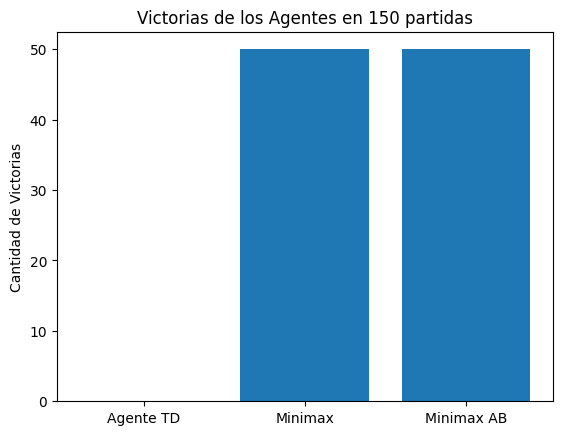

In [11]:

labels = ['Agente TD', 'Minimax', 'Minimax AB']
victorias = [
    res_td_vs_min[1],
    res_td_vs_min[2],
    0
]

victorias[0] += res_td_vs_ab[1]
victorias[2] += res_td_vs_ab[2]
# victorias[1] += res_min_vs_ab[1]
# victorias[2] += res_min_vs_ab[2]

plt.bar(labels, victorias)
plt.title("Victorias de los Agentes en 150 partidas")
plt.ylabel("Cantidad de Victorias")
plt.savefig("resultados_agentes.png")
plt.show()
